# Subclustering of midline cells in Set 1

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/Set1/seu_HQC2_Set1.obj')
seu_HQC

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


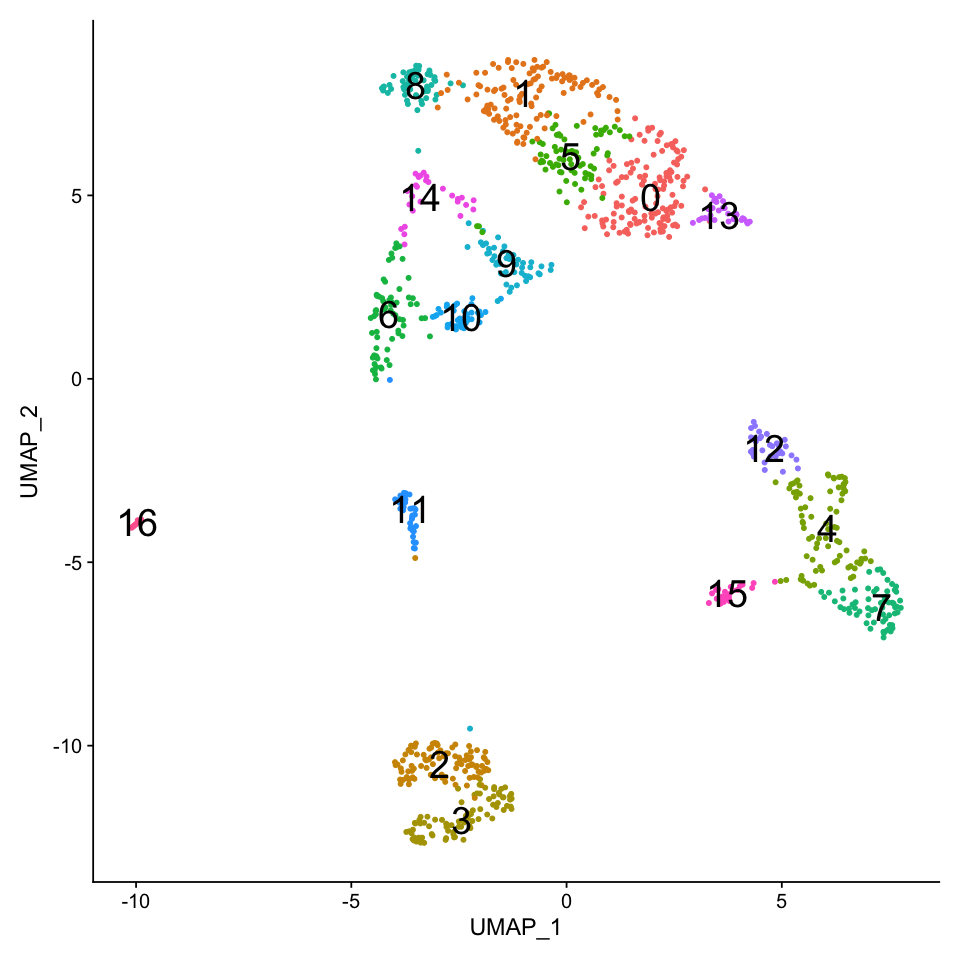

In [4]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

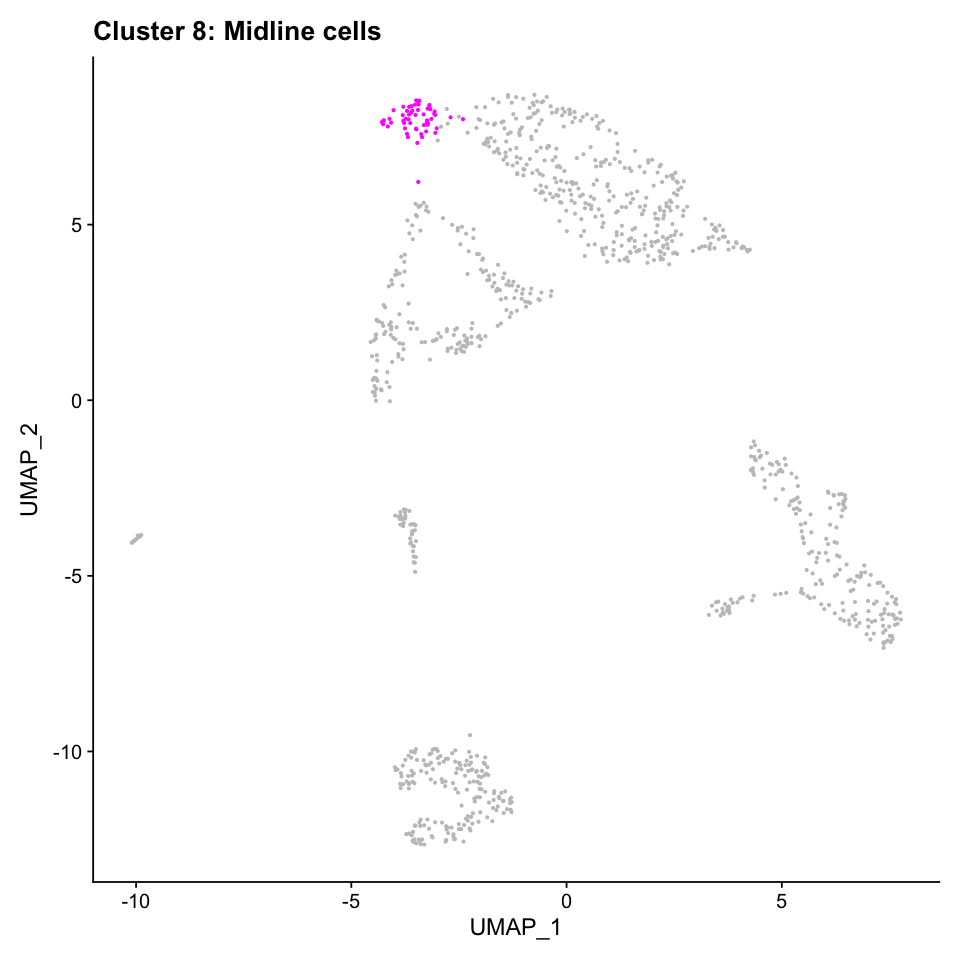

In [5]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(8))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 8: Midline cells')

In [6]:
seu.midline <- subset(seu_HQC, ident = c(13))
seu.midline

An object of class Seurat 
28877 features across 31 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

## Clustering
Num of cells < 500  
Skipping re-normalize

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
PC_ 1 
Positive:  rib, zfh1, stumps, sna, CG10479, Lac, Meltrin, hll, Myc, srp 
	   aop, disco, CG13427, net, Gmap, ps, smal, Atx-1, Act87E, cic 
	   dpp, Mes2, mthl1, fog, retn, twi, lncRNA:CR43887, shn, cv-2, Mef2 
Negative:  sim, rho, vn, vnd, sog, wntD, SoxN, brk, E(spl)m7-HLH, toc 
	   Sema1b, S, edl, ImpL2, D, Zasp52, E(spl)m4-BFM, l(1)sc, esg, Tom 
	   Brd, fend, Ocho, E(spl)malpha-BFM, Tollo, CG43355-sala, pnt, Lrt, mfas, E(spl)m8-HLH 
PC_ 2 
Positive:  28SrRNA-Psi:CR45860, RpL39, 28SrRNA-Psi:CR40741, lncRNA:CR40469, ich, CG43355-sala, RpL41, CG41128, Zasp52, 28SrRNA-Psi:CR45855 
	   lncRNA:CR34335, sun, UQCR-Q, smt3, eve, mfas, CG7630, His4r, Pka-C3, CG8860 
	   tsr, Rpb11, Ndae1, RpL38, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 31
Number of edges: 465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2000
Number of communities: 1
Elapsed time: 0 seconds


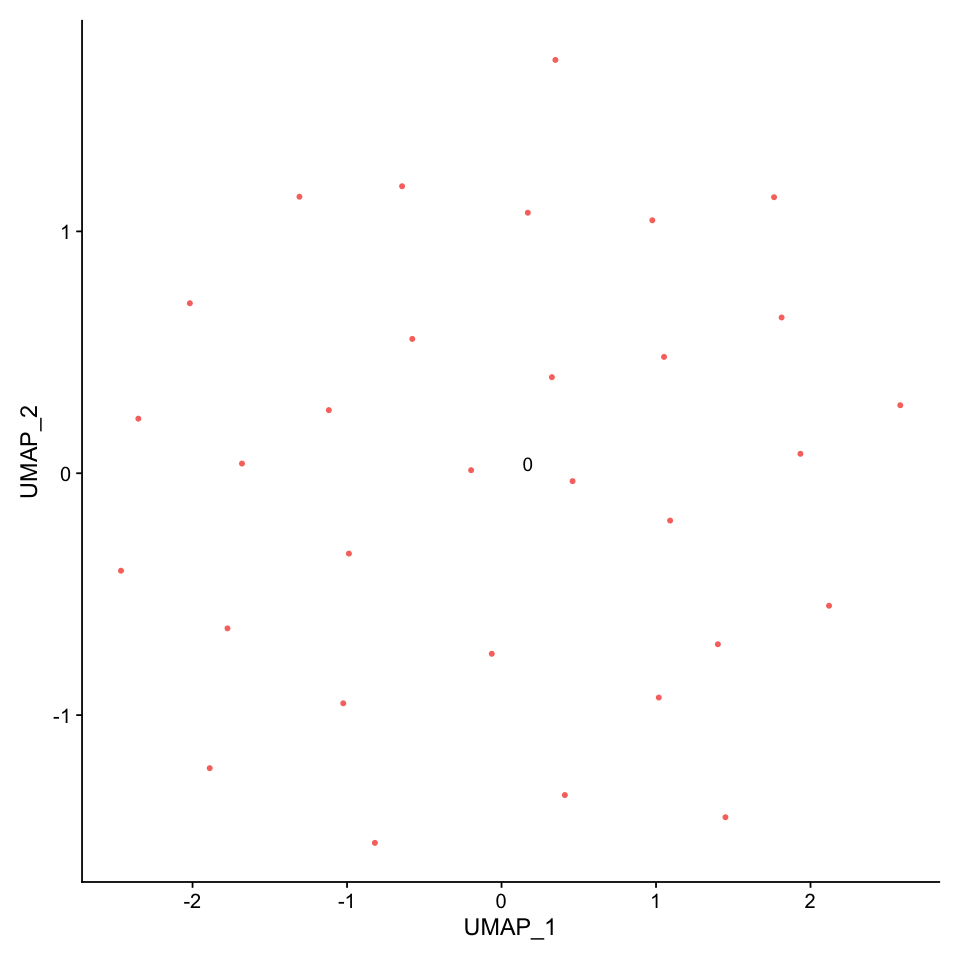

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
seu.midline <- RunPCA(seu.midline, npcs = 30)
seu.midline <- RunUMAP(seu.midline, dims = 1:30)
seu.midline <- FindNeighbors(seu.midline, dims = 1:30)
seu.midline <- FindClusters(seu.midline)
DimPlot(seu.midline, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 31
Number of edges: 465

Running Louvain algorithm...
Maximum modularity in 10 random starts: -0.0169
Number of communities: 7
Elapsed time: 0 seconds


2 singletons identified. 5 final clusters.



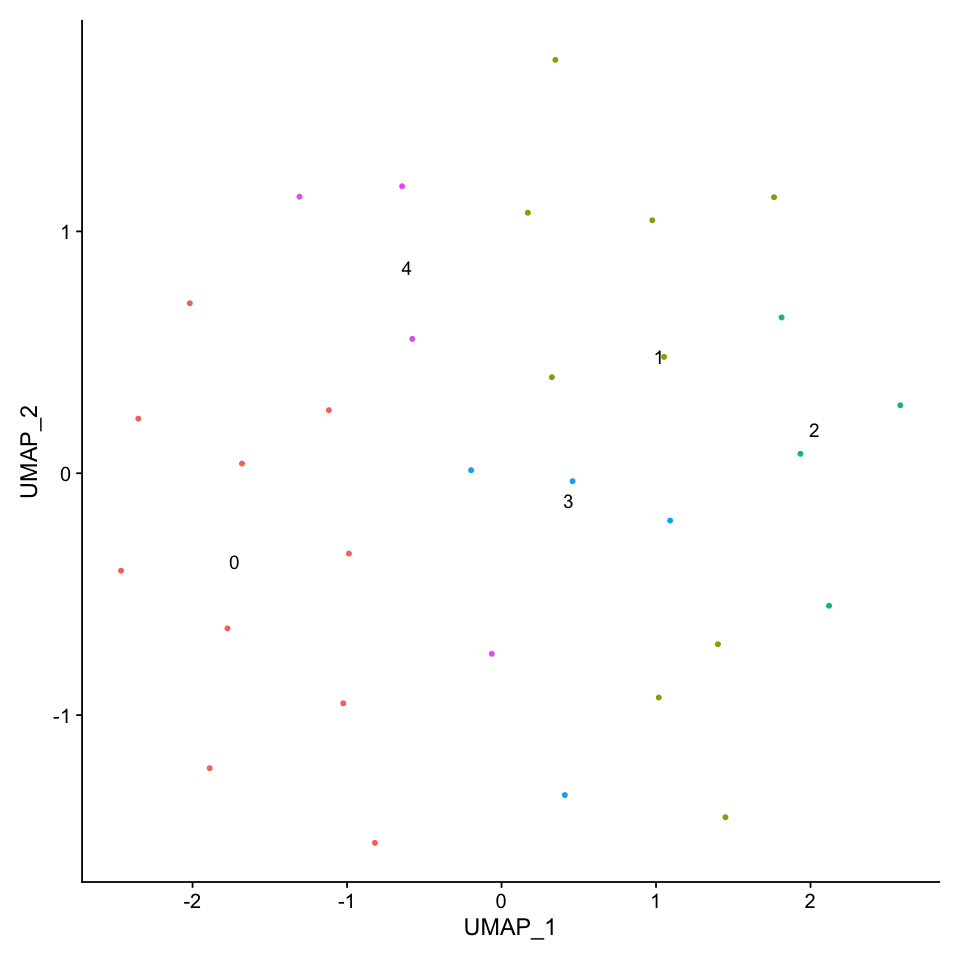

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu.midline <- FindClusters(seu.midline, resolution = 1.1)
DimPlot(seu.midline, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 31
Number of edges: 465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0245
Number of communities: 2
Elapsed time: 0 seconds


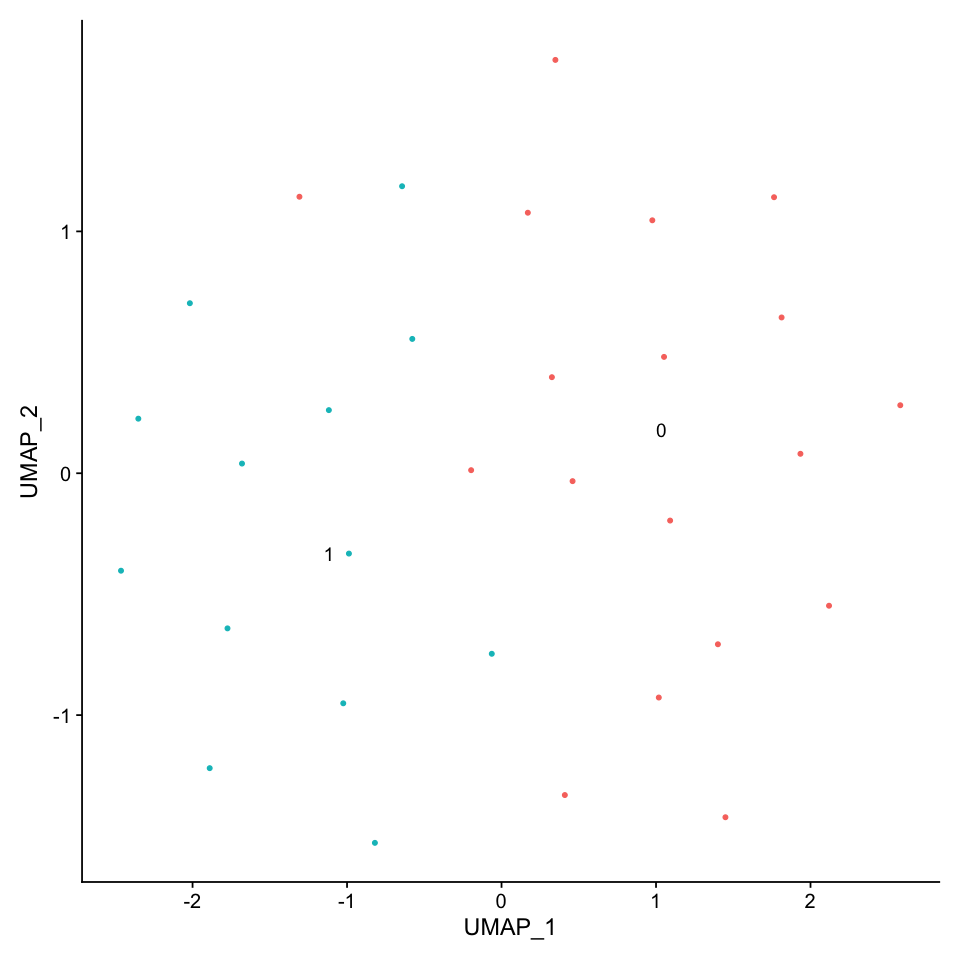

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.midline <- FindClusters(seu.midline, resolution = 1.0)
DimPlot(seu.midline, reduction = 'umap', label = T) + NoLegend()

In [10]:
all.markers <- FindAllMarkers(object = seu.midline, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster 0

Calculating cluster 1



[1] 178

[1] 20

Warning message in DoHeatmap(seu.midline, features = c(all.markers.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG11279, CG10420, crc, CG8679, CG4730, CG9886, Gyg, CG13623, Usp1, mt:ori, MFS17, Pp2C1, cdm”


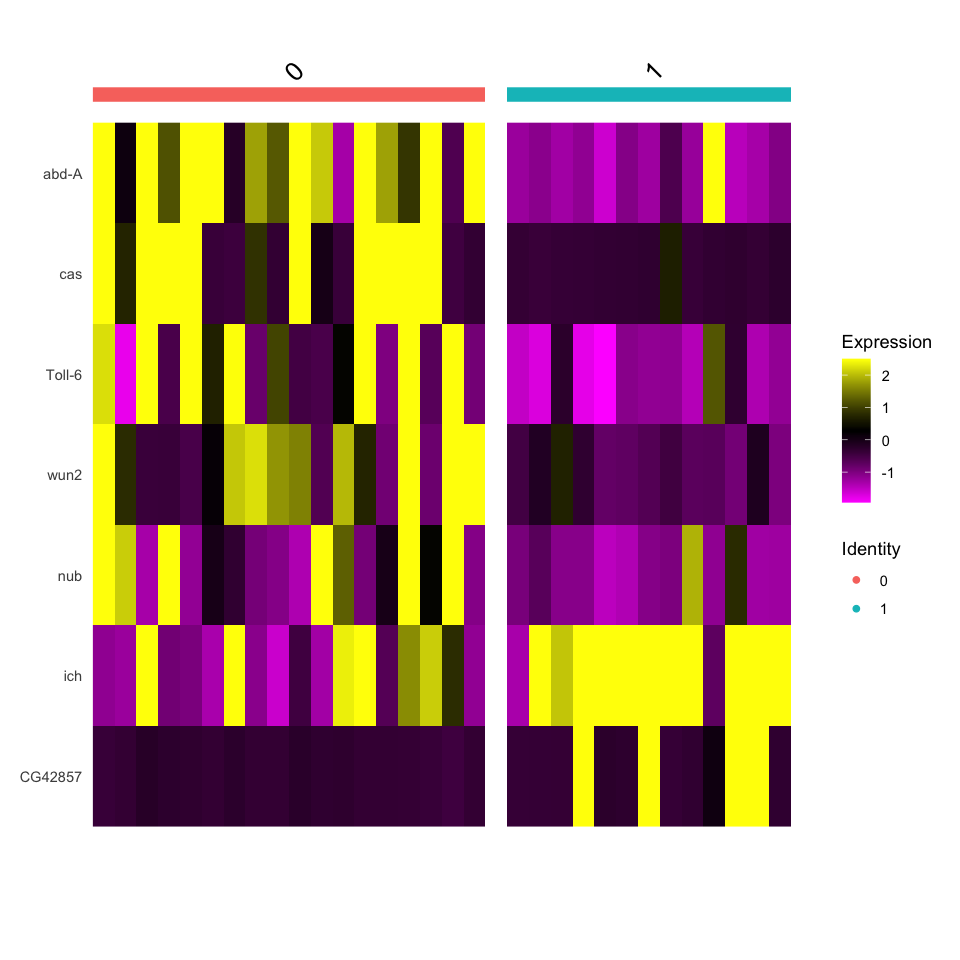

In [11]:
options(repr.plot.width=8, repr.plot.height=8)
DoHeatmap(seu.midline, features = c(all.markers.top10$gene))

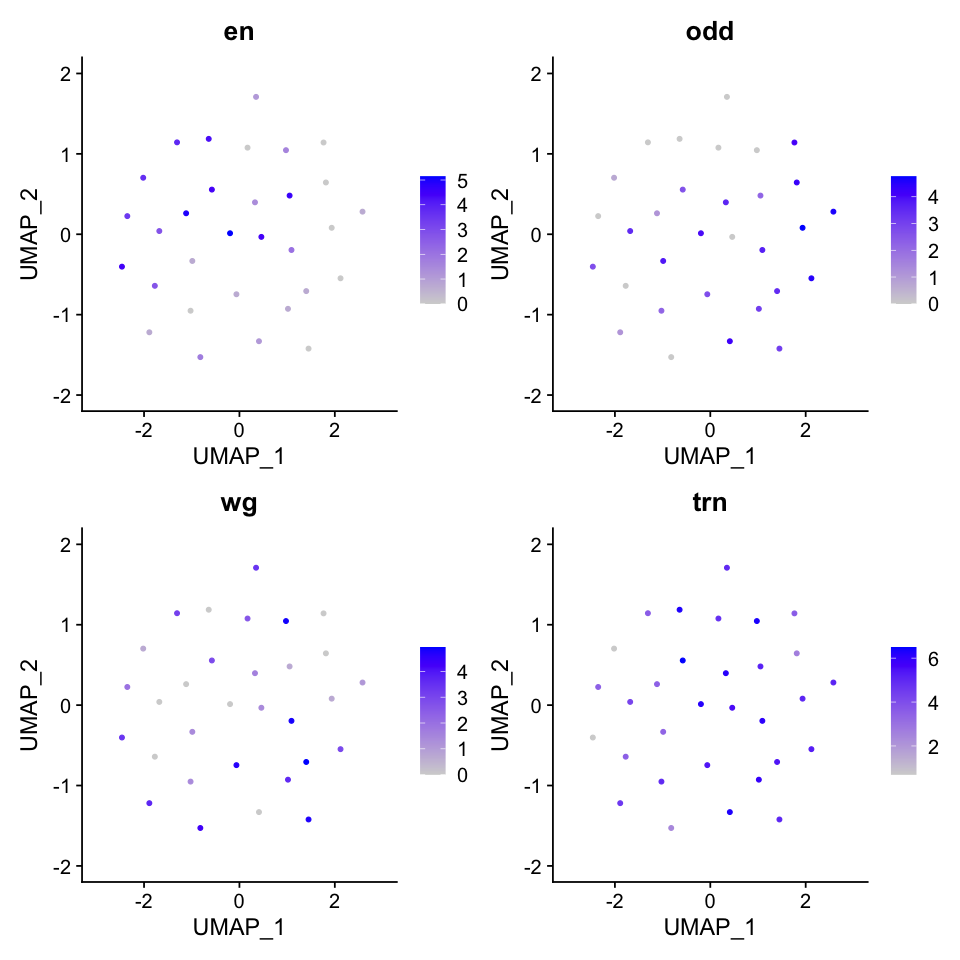

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.midline, features = c('en','odd','wg','trn'))

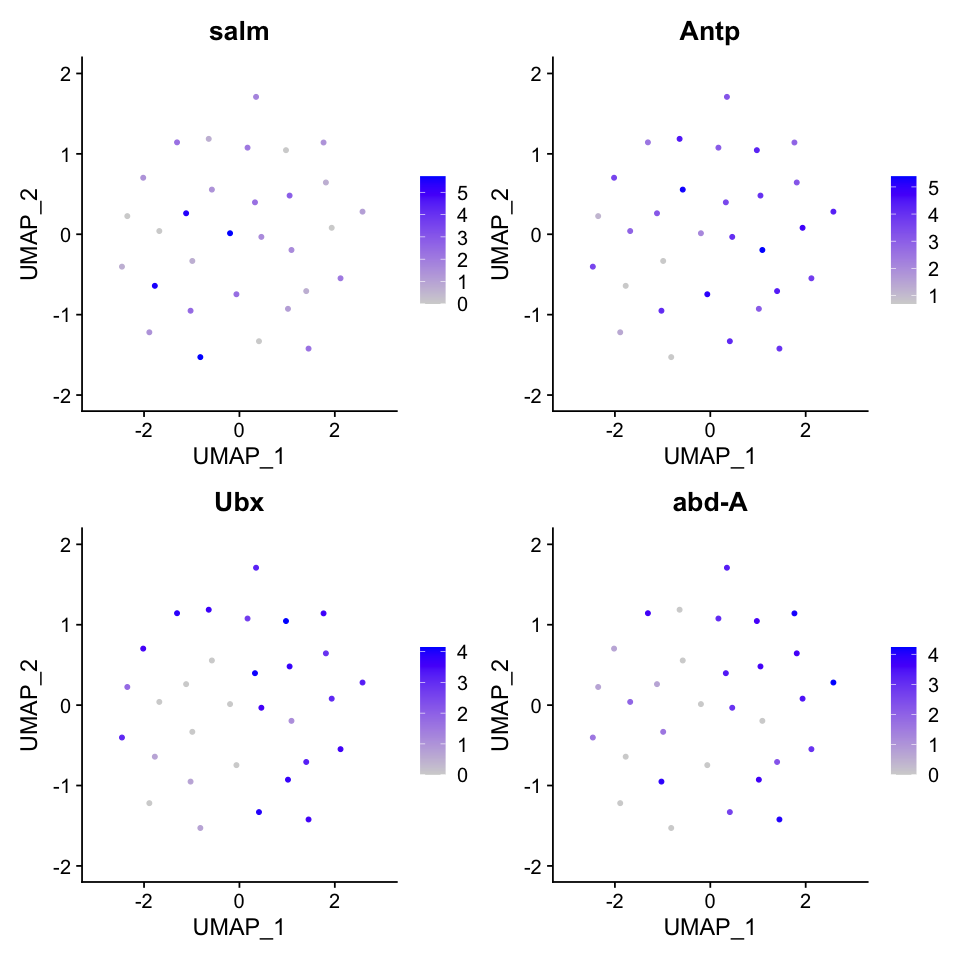

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.midline, features = c('salm','Antp','Ubx','abd-A'))

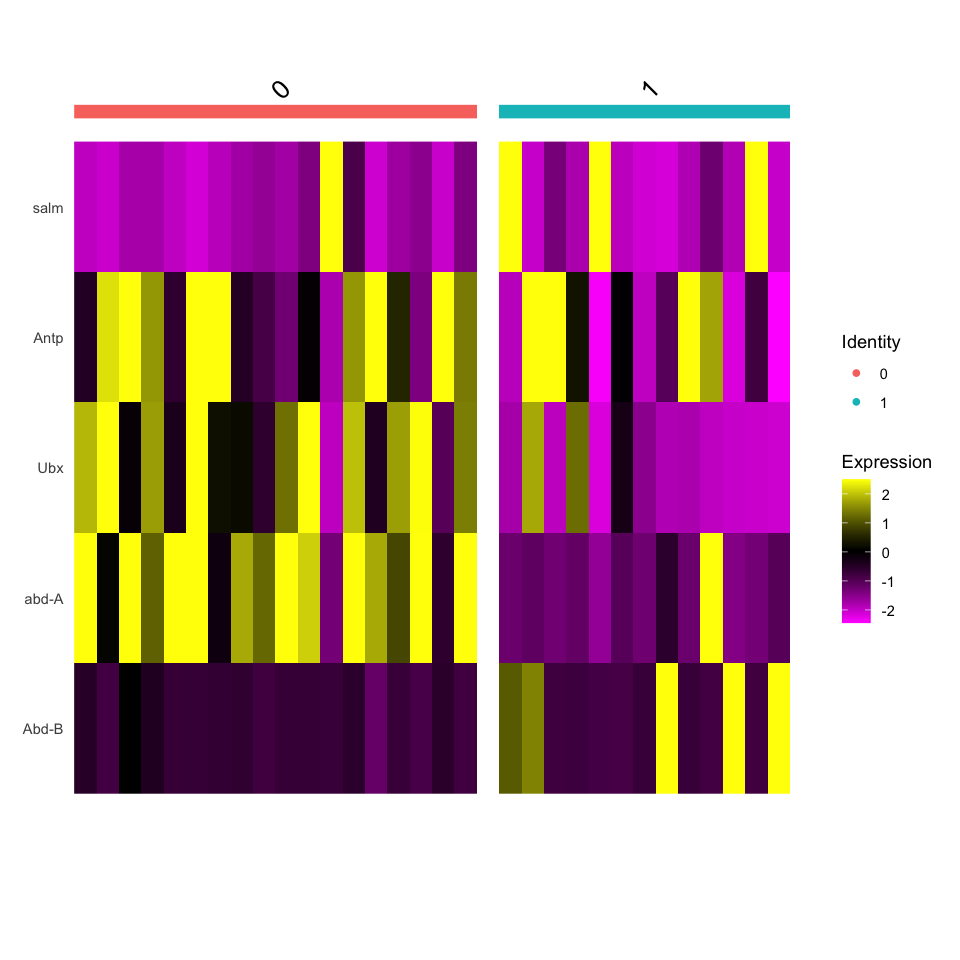

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
DoHeatmap(seu.midline, features = c('salm','Antp','Ubx','abd-A','Abd-B'))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 31
Number of edges: 465

Running Louvain algorithm...
Maximum modularity in 10 random starts: -0.0169
Number of communities: 7
Elapsed time: 0 seconds


2 singletons identified. 5 final clusters.



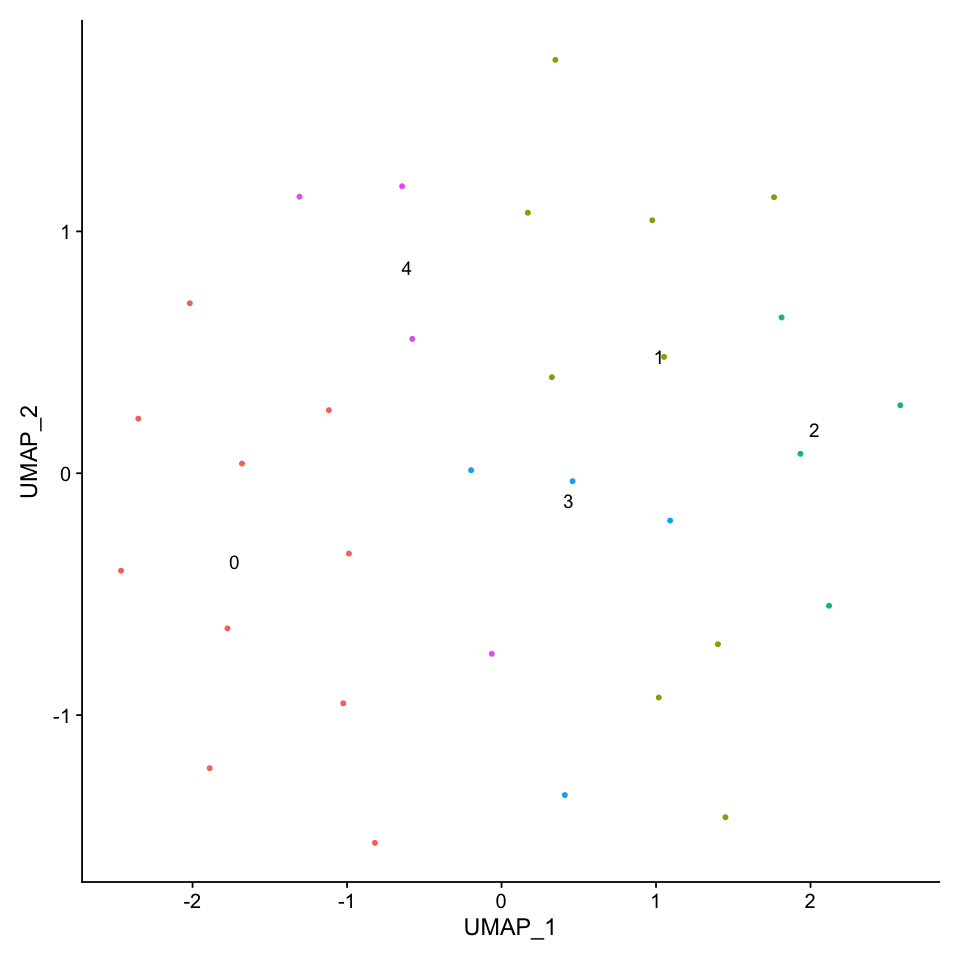

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
seu.midline <- FindClusters(seu.midline, resolution = 1.1)
DimPlot(seu.midline, reduction = 'umap', label = T) + NoLegend()

In [16]:
all.markers <- FindAllMarkers(object = seu.midline, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



[1] 319

[1] 50

Warning message in DoHeatmap(seu.midline, features = c(all.markers.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: pst, CG30343, lncRNA:CR44932, CG17122, Atpalpha, Rhau, apolpp, lncRNA:CR45899, Sym, Orct2, CG32473, TrpRS, Cap-D3, babos, CG2938, CG3349, Vdup1, Lfg, CG8281, CG1578, mri, CG31174, Grip163, CG32533, CG14434, CG9886, CalpC, CG8679, Gyg, CG11722, CG32428, CG13623”


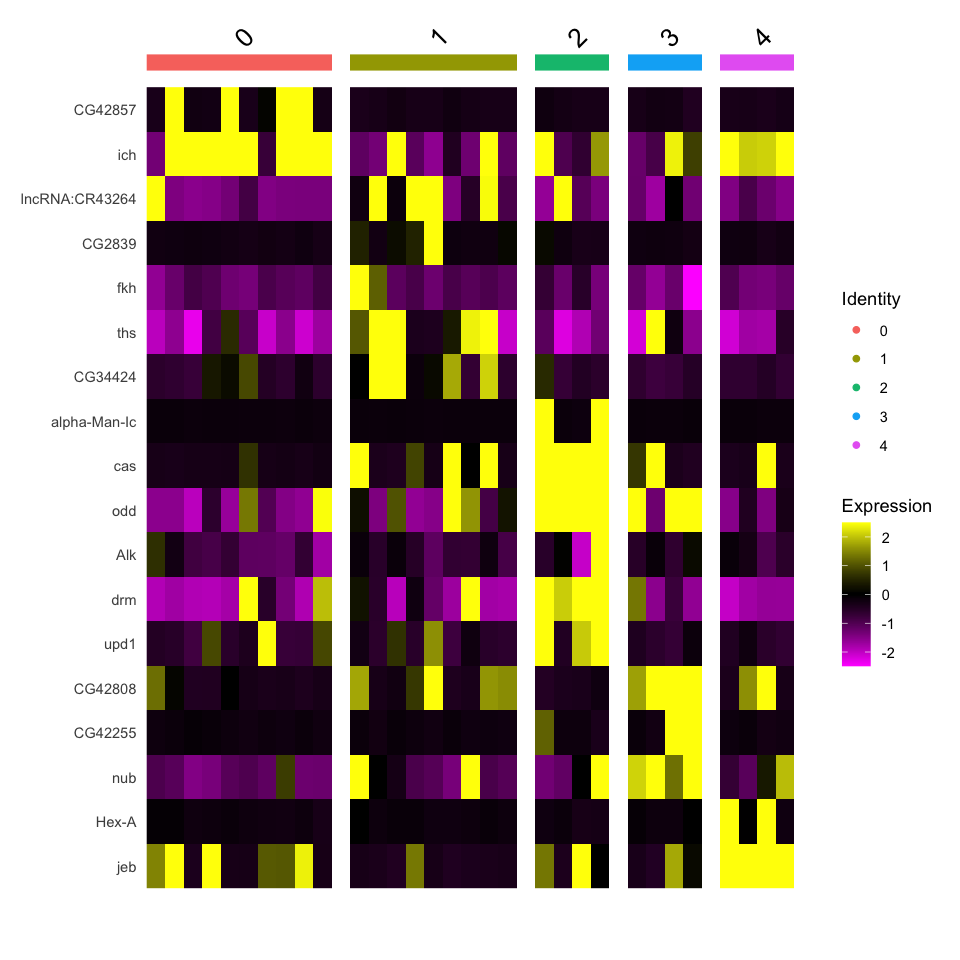

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
DoHeatmap(seu.midline, features = c(all.markers.top10$gene))

No subclusters were detected